# EDA

In [1]:
import os

import numpy as np
import pandas as pd

import plotly.express as ex
import matplotlib.pyplot as plt
import seaborn as sns

params

In [2]:
DATA_DIR = '../../../datasets/kaggle/spaceship-titanic/'

## import data

In [3]:
df = pd.read_csv(os.path.join(DATA_DIR, 'train.csv'))
print(df.shape)
df.head()

(8693, 14)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


data_descr

In [5]:
num_cols = []
cat_cols = []

for colname in df.columns:
    if df[colname].dtype in ['int64', 'float64']:
        num_cols.append(colname)
    else:
        cat_cols.append(colname)

len(num_cols), len(cat_cols)

(6, 8)

수치형 데이터의 분포

In [6]:
print("num_cols: ", num_cols)

num_cols:  ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']


In [7]:
df[num_cols].describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RoomService'}>],
       [<Axes: title={'center': 'FoodCourt'}>,
        <Axes: title={'center': 'ShoppingMall'}>],
       [<Axes: title={'center': 'Spa'}>,
        <Axes: title={'center': 'VRDeck'}>]], dtype=object)

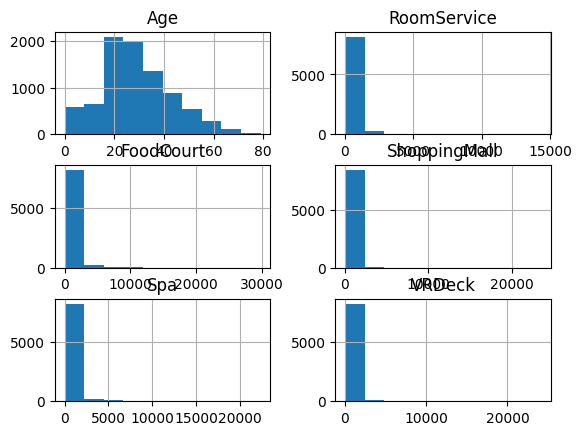

In [8]:
df[num_cols].hist()

In [10]:
from scipy.stats import skew

In [11]:
positive_skewed_cols = []
negative_skewed_cols = []

for col in num_cols:
    # Calculate skewness
    skewness = skew(df[col], nan_policy='omit')
    print(f"{col} skewness: ", skewness)
    if skewness >= 1:
        positive_skewed_cols.append(col)
    elif skewness <= -1:
        negative_skewed_cols.append(col)

print(positive_skewed_cols)
print(negative_skewed_cols)

Age skewness:  0.41902274279363194
RoomService skewness:  6.331897992292122
FoodCourt skewness:  7.100975929666802
ShoppingMall skewness:  12.62532959655537
Spa skewness:  7.634673869355721
VRDeck skewness:  7.818352383103639
['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
[]


In [12]:
for col in positive_skewed_cols:
    # log transform
    df[col] = np.log1p(df[col])

In [13]:
# 이전보다 좋아진 것을 확인
for col in num_cols:
    # Calculate skewness
    skewness = skew(df[col], nan_policy='omit')
    print(f"{col} skewness: ", skewness)

Age skewness:  0.41902274279363194
RoomService skewness:  1.1175388331976377
FoodCourt skewness:  1.1105924704732988
ShoppingMall skewness:  1.2013635659617452
Spa skewness:  1.0898326520475103
VRDeck skewness:  1.1599618998771537


In [14]:
for col in num_cols:
    iqr = df[col].quantile(q=.75) - df[col].quantile(q=.25)
    lower_bound = df[col].quantile(q=.25) - iqr * 1.5
    upper_bound = df[col].quantile(q=.75) + iqr * 1.5
    # print(lower_bound, upper_bound)

    number_of_outliers = df[
        (df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    print(number_of_outliers)
    
    df.loc[df[col] < lower_bound, col] = lower_bound
    df.loc[df[col] > upper_bound, col] = upper_bound

77
0
0
28
0
5


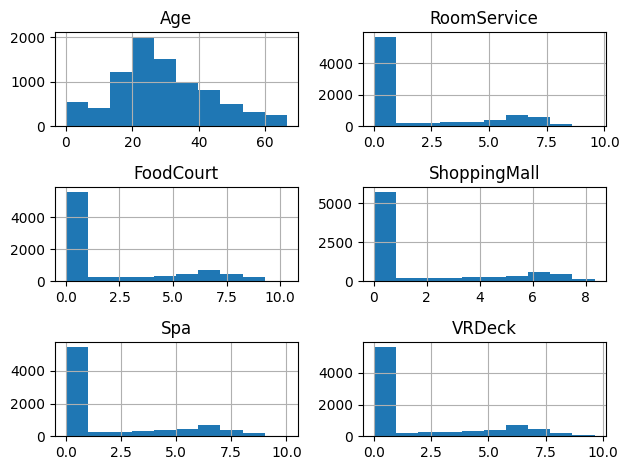

In [15]:
df.hist(column=num_cols[:15])
plt.tight_layout()
plt.show()

범주형 데이터의 분포

In [16]:
df[cat_cols].describe()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,Transported
count,8693,8492,8476,8494,8511,8490,8493,8693
unique,8693,3,2,6560,3,2,8473,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall,True
freq,1,4602,5439,8,5915,8291,2,4378


In [17]:
# cabin

df['deck'] = df['Cabin'].apply(lambda x: x.split('/')[0] if type(x) != float else np.nan)
df['num'] = df['Cabin'].apply(lambda x: x.split('/')[1] if type(x) != float else np.nan).astype('float')
df['side'] = df['Cabin'].apply(lambda x: x.split('/')[2] if type(x) != float else np.nan)

In [18]:
num_cols.append('num')
cat_cols += ['deck', 'side']

In [19]:
onehot_cols = []
for colname in cat_cols:
    if len(df[colname].unique()) \
        <= df.shape[0]*0.1:
        onehot_cols.append(colname)

# preprocessing

In [21]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer

In [38]:
for col in onehot_cols:
    mode = df[col].mode()[0]
    df[col].fillna(mode, inplace=True)

In [40]:
ohe = OneHotEncoder()
ohe = ohe.fit(df[onehot_cols])
ohe.get_feature_names_out()

array(['HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'CryoSleep_False', 'CryoSleep_True', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e',
       'VIP_False', 'VIP_True', 'Transported_False', 'Transported_True',
       'deck_A', 'deck_B', 'deck_C', 'deck_D', 'deck_E', 'deck_F',
       'deck_G', 'deck_T', 'side_P', 'side_S'], dtype=object)

In [41]:
df_cat_array = ohe.transform(df[onehot_cols]).toarray()
df_cat_array.shape

(8693, 22)

In [42]:
df[ohe.get_feature_names_out()] = df_cat_array
df = df.drop(columns=cat_cols)

In [43]:
# df = pd.concat([df, pd.get_dummies(df[['Sex', 'Embarked']])], axis=1)
# df = df.drop(columns=['Sex', 'Embarked'])
# df.columns

In [44]:
# df = df.drop(columns=['Name', 'Ticket'])
# df.columns

In [45]:
# ## !! cabin 전처리도 은근 빡쎔 걍 패스하자
# # df['Cabin_area'] = df['Cabin'].apply(lambda x: x[0] if type(x) != float else np.nan)
# # df['Cabin_number'] = df['Cabin'].apply(lambda x: int(x[1:]) if type(x) != float else np.nan)
# df = df.drop(columns='Cabin')
# df.columns

# Correlation analysis with Pearson

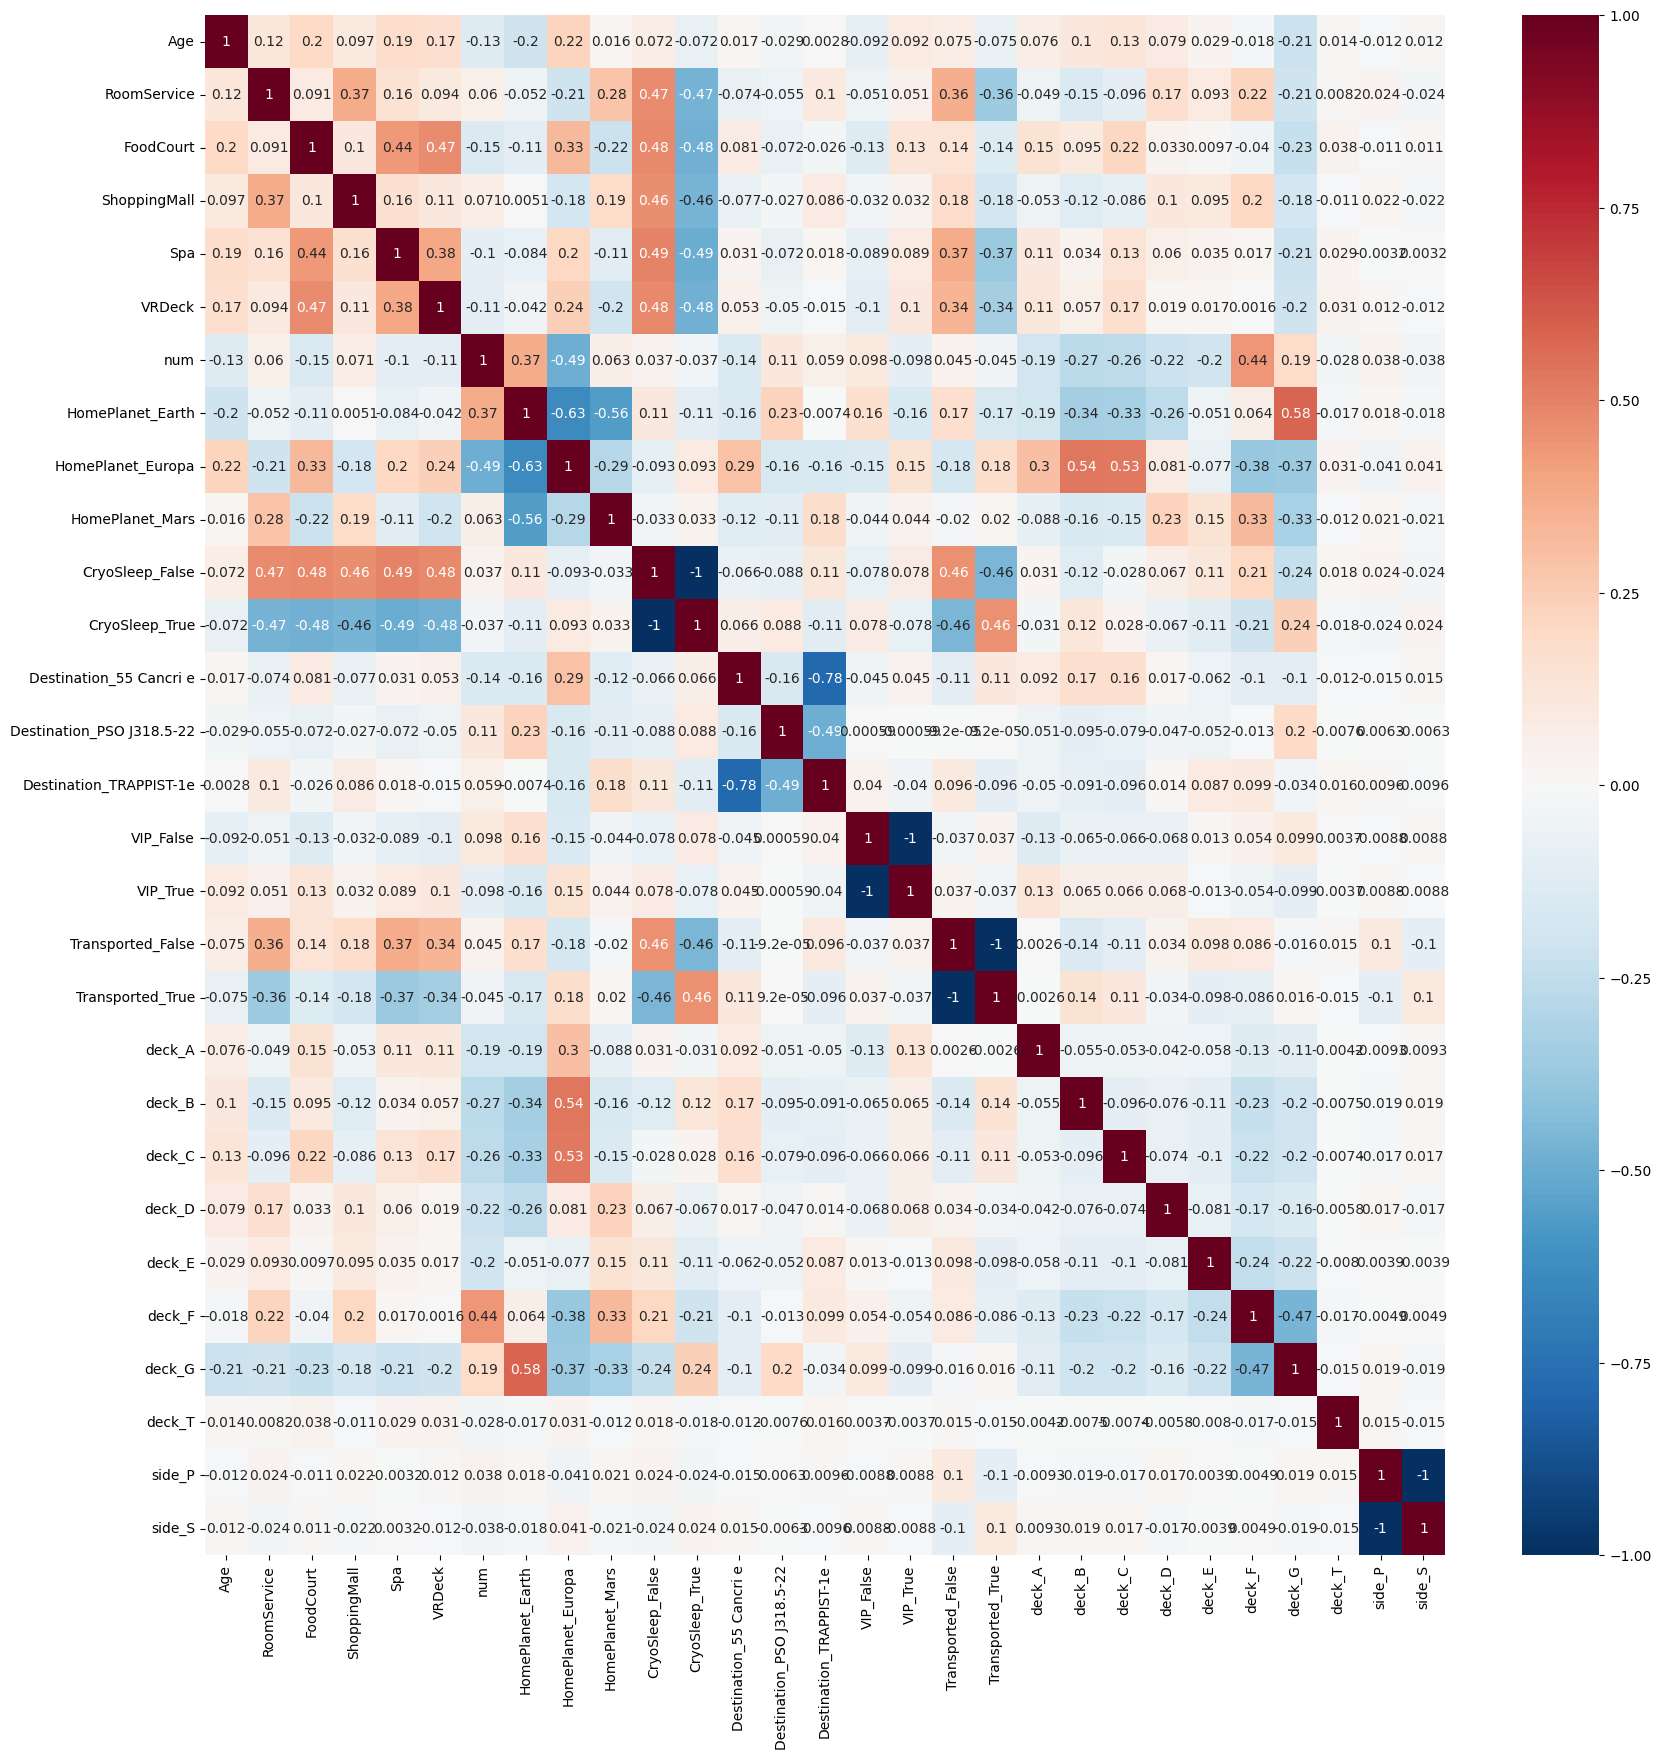

In [47]:
df_corr = df.corr()

plt.figure(figsize = (20,20))
sns.heatmap(df_corr, annot=True, cmap='RdBu_r')
plt.show()
# ex.imshow(df_corr, color_continuous_scale='RdBu_r', text_auto=True, width=1000, height=1000)
## https://plotly.com/python/heatmaps/

In [49]:
sns.pairplot(df)